# Data cleaning

##  Imports
The aim is to identify the common cause of accidents and identify at risk drivers and also identify possible locations with higher accident numbers. These location can then be mapped by the city or responsible authority to reduce the number of fatal accidents.
Insurance companies can also prepare appropriately

The data used can be found in [Canada Open Data](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a). The followings are covered in this notebook

   - Steps to getting the data
   - Display some features of raw data
   - Prepare or clean the information
   - Visualize fatal and non-fatal accidents
   
   
 After cleaning, two copy of the data will be kept, one for training, and one for test
 
 We aim to predict if there will be medical attention needed in the collision. This will warn the insurance company early so as to prepare accordingly. The attention could be if there is death, or hospilization.

In [1]:
%load_ext autoreload
%autoreload 2

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
%matplotlib inline
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
#import seaborn as sns

# Set font scale and style
#sns.set(font_scale = 1.5)
#sns.set_style('ticks')
#sns.set()

##  Load original data

In [2]:
data = pd.read_csv('/home/siro/Downloads/NCDB_1999_to_2016 (1).csv')
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [3]:
data.head(3)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752


Please note that in each attribute the values with U, UU, UUU, UUUU represent Unknown. X, XX, XXX, XXXX represent Jurisdiction does not provide this data element. Q, QQ, QQQ, QQQQ represent Choice is other than the preceding values.  N, NN, NNN, NNNN represent Data element is not applicable. Please see the explanatory docx file in the Data folder for a full explanation of the attributes and their values.

In [4]:
# Data size
data.shape

(6486831, 23)

The data file is very big, so we will avoid creating copies of the files to effectively manage the memory

In [5]:
# Rename the class variable
data.rename(columns = {'C_SEV':'FATAL'}, inplace=True)

In [6]:
# Drop duplicate rows
data.drop_duplicates(inplace=True) 

In [7]:
# Data size after removing duplicate rows
data.shape

(6486039, 23)

In [8]:
# Data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486039 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


- There are only 3 numerical attributes out of 23 attributes.

The data show no missing values because some of the attributes contain inconsistent formats like U, X, N, and Q as stated above. 

In [9]:
# Replace letters with numpy nan
letter_list = ['U', 'UU', 'UUU', 'UUUU', 'Q', 'QQ', 'QQQ', 'QQQQ', 
               'N', 'NN', 'NNN', 'NNNN', 'X', 'XX', 'XXX', 'XXXX']
data.replace(letter_list, np.nan, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486039 entries, 0 to 6486830
Data columns (total 23 columns):
C_YEAR    int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
FATAL     int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE    int64
dtypes: int64(3), object(20)
memory usage: 1.2+ GB


In [11]:
# Percentage of missing values
percentage_missing_values = (data.isnull().sum()/data.shape[0])*100

# Create a dataframe of missing values
Missing_df = pd.DataFrame({'Variable': percentage_missing_values.index, 
                          'Percentage Missing': percentage_missing_values.values})
Missing_df.sort_values(by = 'Percentage Missing', ascending = False)

,Variable,Percentage Missing
20,P_SAFE,21.140406
7,C_RCFG,10.758353
14,V_YEAR,9.883675
6,C_CONF,7.968931
10,C_RALN,7.642153
17,P_AGE,6.784480
19,P_ISEV,6.423782
11,C_TRAF,5.279879
13,V_TYPE,4.868303
16,P_SEX,4.455369


- Indeed, there are lots of missing values in the attributes.

- P_SAFE has the largest percentage of missing values followed by C_RCFG

- There are no missing values in C_YEAR,  C_CASE, and FATAL (class variable), 

## We can start buy just droping the NANs

In [13]:
#The data is huge for a pc, so I will simple drop the columns with missing values
data.dropna(inplace=True)

In [96]:
data.shape

(3655334, 22)

##  Convert variables to the correct format

Based on the data information, there are many categorical variables encoded as numbers. We will now convert them  to the correct description to better understand the data

### Day of week

In [14]:
data.C_WDAY.unique()

array([1, 2, 3, 4, 5, 6, 7, '7', '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [15]:
week_dict = {'1': 'Monday','2': 'Tuesday','3':'Wednesday','4':'Thursday',
             '5':'Friday', '6': 'Saturday', '7':'Sunday',1: 'Monday',2: 'Tuesday',3:'Wednesday',
             4:'Thursday',5:'Friday', 6: 'Saturday', 7:'Sunday'} 

In [16]:
data['C_WDAY'].replace(week_dict, inplace=True) 

In [17]:
data.C_WDAY.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

### Month of the year

In [18]:
data.C_MNTH.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', '01', '02', '11'],
      dtype=object)

In [19]:
month_dict = {1: 'January', '01': 'January', 2: 'February','02': 'February',3: 'March', 4: 'April',
             5:'May', 6: 'June', 7: 'July',8: 'August', 9: 'September',10: 'october', 11: 'November',
              '11': 'November', 12: 'December', '12': 'December'}

In [20]:
data['C_MNTH'].replace(month_dict, inplace=True)

In [21]:
data.C_MNTH.value_counts()

August       341307
July         336804
June         326659
october      324108
December     322467
September    319472
November     309882
January      305674
May          296966
February     267027
March        255419
April        249549
Name: C_MNTH, dtype: int64

In [22]:
data.C_MNTH.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'october', 'November', 'December'],
      dtype=object)

- Also the months are encoded as integers  ranging from 1 to 12

### Collision hour

In [23]:
data.C_HOUR.unique()

array(['09', '20', '05', '08', '14', '07', '13', '15', '11', '22', '10',
       '18', '16', '12', '17', '06', '03', '21', '01', '23', '00', '04',
       '19', '02'], dtype=object)

We will convert hour to numeric

In [24]:
data['C_HOUR'] = pd.to_numeric(data['C_HOUR'], errors = 'coerce', downcast='integer')

In [25]:
data.C_HOUR.dtypes

dtype('int8')

### Number of vehicles involved in collision

In [26]:
data.C_VEHS.unique()

array(['02', '01', '03', '04', '06', '09', '05', '07', '13', '08', '14',
       '10', 2, 1, 3, 4, 5, 6, 8, 7, 10, '16', '71', 9, '11', '21', '27',
       '12', '15', 15, 13, 26, 27, 46, 25, 31, 12, '18', 18, 56, '23', 36,
       11, '19', 20, '29', 14, 38, '38', '17', '32', '22', 35, 22, 33, 19,
       17, '40', 58, '30', '77', '34', 24, 39, 57, 43, 37, 16, 47, 21],
      dtype=object)

The number of vehicles involved in an accident contains inconsistent numbering, e.g '01', '02', and so on. We  will correct this typos and convert the attribute to numeric

In [27]:
data['C_VEHS'].replace(['01','02','03','04','05','06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [28]:
data['C_VEHS'] = pd.to_numeric(data['C_VEHS'], errors = 'coerce', downcast='integer')

In [29]:
data.C_VEHS.dtypes

dtype('int8')

### Collision configuration

In [30]:
data.C_CONF.unique()

array(['34', '03', '01', '33', '21', '04', '24', '35', '31', '02', '23',
       '32', '06', '36', '41', '05', '22', '25'], dtype=object)

In [31]:
coll_dict = {'01': 'Hit a moving object', '02': 'Hit a stationary object', '03': 'Ran off left shoulder',
                 '04': 'Ran off right shoulder', '05': 'Rollover on roadway', '06': 'Any other single-vehicle ',
                 '34': 'Right turn', '31': 'Head-on collision', '21': 'Rear-end collision', 
                  '23': 'left turn conflict', '33': 'Left turn across opposing traffic',
                 '24': 'right turn conflict', '35': 'Right angle collision', '41': 'Hit a parked motor vehicle',
                 '32': 'Approaching side-swipe', 
                  '36': 'Any other two-vehicle - different direction', '22': 'Side swipe', 
                  '25': 'Any other two-vehicle - same direction'}

In [32]:
data['C_CONF'].replace(coll_dict, inplace=True)

In [33]:
data.C_CONF.value_counts()

Rear-end collision                             1271029
Right angle collision                           590828
Any other two-vehicle - different direction     385169
Any other single-vehicle                        327952
Left turn across opposing traffic               280262
Side swipe                                      148948
Head-on collision                               138580
Ran off right shoulder                          127528
Ran off left shoulder                            96957
Hit a stationary object                          79980
Right turn                                       40836
left turn conflict                               37686
Hit a moving object                              34207
Hit a parked motor vehicle                       29384
right turn conflict                              27828
Approaching side-swipe                           24374
Rollover on roadway                               8310
Any other two-vehicle - same direction            5476
Name: C_CO

### Roadway configuration

In [34]:
data.C_RCFG.unique()

array(['02', '03', '05', '01', '04', '06', '08', '07', '09', '10'],
      dtype=object)

In [35]:
roadway_dict = {'01': 'Non-intersection', '02':'At an intersection', 
                '03': 'Intersection with parking lot entrance', '04': 'Railroad level crossing',
               '05': 'Bridge, overpass, viaduct', '06': 'Tunnel or underpass', '07': 'Passing or climbing lane',
               '08': 'Ramp', '09': 'Traffic circle', '10': 'Express lane of a freeway system'}

In [36]:
data['C_RCFG'].replace(roadway_dict, inplace=True)

In [37]:
data.C_RCFG.value_counts()

At an intersection                        1932020
Non-intersection                          1452983
Intersection with parking lot entrance     212822
Bridge, overpass, viaduct                   33401
Railroad level crossing                     11430
Ramp                                         6833
Tunnel or underpass                          4113
Traffic circle                               1141
Passing or climbing lane                      352
Express lane of a freeway system              239
Name: C_RCFG, dtype: int64

### Weather condition

In [38]:
data.C_WTHR.unique()

array(['1', '3', '4', '2', '6', '5', '7'], dtype=object)

In [39]:
weather_dict = {'1': 'Clear and sunny', '2': 'Overcast, cloudy but no precipitation', '3': 'Raining',
            '4': 'Snowing', '5': 'Freezing rain, sleet, hail', '6': 'Visibility limitation', '7': 'Strong wind'}

In [40]:
data['C_WTHR'].replace(weather_dict, inplace=True)

In [41]:
data.C_WTHR.value_counts()

Clear and sunny                          2611663
Raining                                   404795
Overcast, cloudy but no precipitation     339134
Snowing                                   217690
Visibility limitation                      53101
Freezing rain, sleet, hail                 19740
Strong wind                                 9211
Name: C_WTHR, dtype: int64

### Road surface

In [42]:
data.C_RSUR.unique()

array(['1', '2', '5', '3', '7', '4', '6', '8', '9'], dtype=object)

In [43]:
roadsurface_dict = {'1':'Dry, normal', '2': 'Wet', '3': 'Snow', '4':'Slush', '5': 'Icy', '6':'Sand/gravel/dirt',
               '7':'Muddy', '8': 'Oil', '9': 'Flooded'}

In [44]:
data['C_RSUR'].replace(roadsurface_dict, inplace=True)

In [45]:
data.C_RSUR.value_counts()

Dry, normal         2492364
Wet                  726339
Icy                  200155
Snow                 164082
Slush                 52731
Sand/gravel/dirt      15872
Muddy                  2950
Oil                     672
Flooded                 169
Name: C_RSUR, dtype: int64

### Road alignment

In [46]:
data.C_RALN.unique()

array(['1', '3', '4', '2', '5', '6'], dtype=object)

In [47]:
roadall_dist = {'1':'Straight and level', '2':'Straight with gradient', '3': 'Curved and level',
               '4':'Curved with gradient', '5': 'Top of hill or gradient', '6': 'Bottom of hill or gradient'}

In [48]:
data['C_RALN'].replace(roadall_dist, inplace=True)

In [49]:
data.C_RALN.value_counts()

Straight and level            2851829
Straight with gradient         392282
Curved and level               234144
Curved with gradient           139669
Top of hill or gradient         22036
Bottom of hill or gradient      15374
Name: C_RALN, dtype: int64

### Traffic control

In [50]:
data.C_TRAF.unique()

array(['01', '05', '18', '06', '03', '04', '07', '08', '10', '16', '02',
       '13', '11', '15', '09', '17', '12'], dtype=object)

In [51]:
tracon_dict ={'01': 'Traffic signals fully operational', '02': 'Traffic signals in flashing mode',
             '03': 'Stop sign', '04': 'Yield sign', '05':'Warning sign', '06':'Pedestrian crosswalk',
             '07': 'Police officer', '08': 'School guard, flagman', '09': 'School crossing',
              '10': 'Reduced speed zone', '11': 'No passing zone sign', '12': 'Markings on the road',
             '13': 'School bus stopped with school bus signal lights flashing',
             '15':'Railway crossing with signals, or signals and gates',
             '16': 'Railway crossing with signs only',
             '17': 'Control device not specified', '18': 'No control present'}
data['C_TRAF'].replace(tracon_dict, inplace=True)

In [52]:
data.C_TRAF.value_counts()

No control present                                           1965540
Traffic signals fully operational                            1131380
Stop sign                                                     452778
Yield sign                                                     43089
School guard, flagman                                          16744
Pedestrian crosswalk                                           16600
Traffic signals in flashing mode                               13441
School bus stopped with school bus signal lights flashing       3469
Markings on the road                                            2311
Railway crossing with signals, or signals and gates             2157
Warning sign                                                    2125
No passing zone sign                                            1461
Police officer                                                  1460
Reduced speed zone                                              1345
Control device not specified      

### Vehicle sequence number

In [53]:
data.V_ID.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '13', '10',
       '11', '12', '15', '14', '18', '21', '23', '25', '26', '28', '31',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '50', '53', '56', '57', '60', '61', '62',
       '65', '68', '71', '16', '17', '19', '20', '22', '24', 2, 1, 3, 4,
       5, 6, 7, 8, 9, 10, '27', '29', 11, 13, 12, '30', '32', '48', '49',
       '51', '52', '54', '55', 22, 23, 32, 14, 15, 16, 17, 18, 19, 20, 21,
       24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, '58',
       '59', '63', '64', '66', '67', '69', '70', '72', '73', '74', '75',
       '76', '77', 47], dtype=object)

There is a mismatch in the vehicle sequence number, e.g. '01' is 1, '02' is 2 and so on

In [54]:
data['V_ID'].replace(['01','02','03','04','05','06', '07','08','09'],  [1,2,3,4,5,6,7,8,9], inplace=True)

In [55]:
# Convert to numeric
data['V_ID'] = pd.to_numeric(data['V_ID'], errors ='coerce', downcast='integer')

### Vehicle type

In [56]:
data.V_TYPE.unique()

array(['01', '06', '08', '11', '07', '09', '17', '14', '05', '18', '10',
       '23', '21'], dtype=object)

In [57]:
vehtype_dict ={'01': 'Light Duty Vehicle', '06': 'Other trucks and vans', '11': 'Urban and Intercity Bus',
              '20': 'Construction equipment', '17': 'Bicycle', '07': 'Unit trucks', '08': 'Road tractor',
              '09': 'School bus', '22': 'Snowmobile', '14': 'Motorcycle and moped', '23': 'Street car',
              '05': 'Panel/cargo van', '16': 'Off road vehicles', 
               '19': 'Farm equipment', '18': 'Purpose-built motorhome',
              '10': 'Smaller school bus', '21': 'Fire engine'}
data['V_TYPE'].replace(vehtype_dict, inplace=True)

In [58]:
data.V_TYPE.value_counts()

Light Duty Vehicle         3302981
Other trucks and vans       109328
Motorcycle and moped         60254
Panel/cargo van              44784
Unit trucks                  44094
Road tractor                 40130
Urban and Intercity Bus      31273
School bus                   14049
Bicycle                       3741
Street car                    1720
Purpose-built motorhome       1629
Smaller school bus             731
Fire engine                    620
Name: V_TYPE, dtype: int64

### Vehicle model year

In [59]:
data.V_YEAR.unique()

array(['1992', '1988', '1995', '1989', '1986', '1990', '1994', '1998',
       '1984', '1993', '1987', '1996', '1991', '1999', '1997', '1985',
       '1981', '1983', '1977', '1979', '1982', '1978', '1974', '1980',
       '1973', '1970', '1971', '1975', '1976', '1968', '1969', '1972',
       '1966', '1967', '1945', '2000', '1950', '1959', '1955', '1958',
       '1964', '1909', '1923', '1960', '1963', '1914', '1908', '1953',
       '1906', '1925', '1965', '1949', '1938', '1907', '1961', '1917',
       '1962', '1944', '1956', '1930', '1931', '1939', '1951', '1946',
       '1952', '1947', '1957', '1954', '1901', '1948', '1937', '1935',
       '1926', '1941', '1932', '1912', '1920', '1903', '1933', '1919',
       '2001', '1913', '1940', '2002', '1916', '1929', '1928', '1942',
       '1918', '2003', '1924', '1922', '1915', '1934', '2004', '2005',
       '1927', '2006', '2007', '2008', '1943', '2009', '2010', '2011',
       '1911', '2012', '2013', '1921', '2014', '2015', '2016'],
      dtype=o

In [60]:
# Convert to numeric
data['V_YEAR'] = pd.to_numeric(data['V_YEAR'], errors = 'coerce', downcast='integer')

In [61]:
data['V_YEAR'].value_counts().head()

2000    214334
2002    200337
2003    194695
1998    190566
1999    188968
Name: V_YEAR, dtype: int64

### Person sequence ID

In [62]:
data.P_ID.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '49', '47', '48', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93'], dtype=object)

In [63]:
data['P_ID'].replace(['01', '02','03','04','05','06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [64]:
data['P_ID'] = pd.to_numeric(data['P_ID'], errors = 'coerce', downcast='integer')

In [65]:
data.P_ID.dtypes

dtype('int8')

### Gender

In [66]:
data.P_SEX.unique()

array(['F', 'M'], dtype=object)

In [67]:
data.P_SEX.value_counts()

M    1966169
F    1689165
Name: P_SEX, dtype: int64

- More males are involved in vehicle collision than females

### Person age

In [68]:
data.P_AGE.unique()

array(['33', '70', '38', '34', '30', '18', '68', '28', '37', '50', '20',
       '53', '71', '26', '51', '41', '63', '25', '23', '55', '36', '16',
       '35', '60', '13', '44', '61', '65', '75', '79', '32', '62', '85',
       '21', '49', '19', '29', '92', '57', '86', '52', '31', '74', '59',
       '48', '43', '15', '12', '76', '39', '73', '69', '04', '27', '47',
       '17', '22', '54', '66', '45', '42', '80', '46', '78', '40', '24',
       '82', '11', '07', '72', '56', '64', '14', '84', '58', '01', '77',
       '67', '09', '02', '10', '06', '08', '03', '05', '83', '88', '81',
       '87', '89', '95', '90', '91', '94', '99', '93', '98', '96', '97'],
      dtype=object)

In [69]:
data['P_AGE'].replace(['01','02','03','04', '05', '06','07','08','09'], [1,2,3,4,5,6,7,8,9], inplace=True)

In [70]:
data['P_AGE'] = pd.to_numeric(data['P_AGE'], errors = 'coerce', downcast='integer')

In [71]:
data.P_AGE.dtypes

dtype('int8')

### Person position

In [72]:
data.P_PSN.unique()

array(['11', '13', '23', '21', '12', '22', '32', '96', '31', '33', '98',
       '97'], dtype=object)

In [73]:
perpos_dict = {'11': 'Driver', '13': 'Front row, right outboard',
               '99': 'Pedestrian', '23': 'Second row, right outboard',
              '98': 'Outside passenger compartment', '21': 'Second row, left outboard',
              '22': 'Second row, center', '12': 'Front row, center', '96': 'Position unknown',
              '32': 'Third row, center', '31': 'Third row, left outboard',
              '33': 'Third row, right outboard', '97': 'Sitting on someone’s lap'}

data['P_PSN'].replace(perpos_dict, inplace=True)

In [74]:
data.P_PSN.value_counts()

Driver                           2468191
Front row, right outboard         662471
Second row, right outboard        202750
Second row, left outboard         164727
Second row, center                 65713
Front row, center                  49834
Third row, center                  23232
Position unknown                   13919
Third row, right outboard           2175
Third row, left outboard            1765
Outside passenger compartment        346
Sitting on someone’s lap             211
Name: P_PSN, dtype: int64

### Medical treatment required

In [71]:
data.P_ISEV.unique()

array(['2', '1', '3'], dtype=object)

In [72]:
med_dict = {'1': 'No Injury', '2': 'Injury', '3': 'Fatality'}
data['P_ISEV'].replace(med_dict, inplace=True)

In [95]:
data.P_ISEV.value_counts()

1    2061478
2    1570775
3      23081
Name: P_ISEV, dtype: int64

### Safety device used

In [75]:
data.P_SAFE.unique()

array(['02', '01', '13', '12', '09', '10'], dtype=object)

In [76]:
safe_dict = {'02': 'Safety device used', '01': 'No safety device used', '13': 'No safety device equipped',
            '12': 'Other safety device used', '09': 'Helmet worn', '10': 'Reflective clothing worn',
            '11': 'Both helmet and reflective clothing used'}
data['P_SAFE'].replace(safe_dict, inplace=True)

In [77]:
data.P_SAFE.value_counts()

Safety device used           3428824
No safety device used         101716
Helmet worn                    54680
No safety device equipped      49359
Other safety device used       20733
Reflective clothing worn          22
Name: P_SAFE, dtype: int64

### Road user class

In [78]:
data.P_USER.unique()

array(['1', '2', '4', '5'], dtype=object)

In [79]:
roaduser_dict = {'1': 'Motor Vehicle Driver', '2': 'Motor Vehicle Passenger', '3': 'Pedestrian',
                '4': 'Bicyclist', '5': 'Motorcyclist'}
data['P_USER'].replace(roaduser_dict, inplace=True)

In [80]:
data.P_USER.value_counts()

Motor Vehicle Driver       2420062
Motor Vehicle Passenger    1171277
Motorcyclist                 60254
Bicyclist                     3741
Name: P_USER, dtype: int64

### Class Distribution

In [81]:
data.FATAL.unique()

array([2, 1])

In [86]:
data.FATAL.value_counts()

2    3596367
1      58967
Name: FATAL, dtype: int64

 The class is encoded as integers 1 and 2, where 1 represents fatal accidents and 2 represents non-fatal accidents. It is useful to recode the class variable as a binary class, where we replace 2 with 0.

In [83]:
data['FATAL'].replace(2, 0, inplace=True) 
data['FATAL'].value_counts()

0    3596367
1      58967
Name: FATAL, dtype: int64

In [87]:
data.P_ISEV.unique()

array(['2', '1', '3'], dtype=object)

(-0.54, 2.5400000000000005, 0.0, 2164551.9)

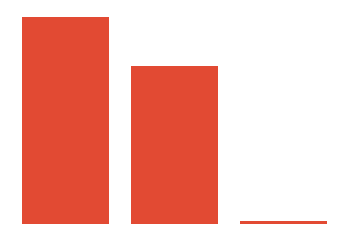

In [88]:
# Set figure font
#sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot bar
#df['FATAL'].value_counts().plot(kind = 'bar', figsize = (8,5), color ='b')
plt.bar(['No Med', 'Medical', 'Fatality'], data['P_ISEV'].value_counts())
plt.xlabel('Class', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.axis('off')

 Let's look at the percentage of the class distribution

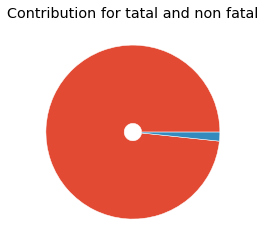

In [89]:
fig, ax = plt.subplots()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
size = 0.9
v = np.array([98.335116, 1.664884])

ax.pie(v, radius=1, 
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Contribution for tatal and non fatal')
plt.show()


In [92]:
data['P_ISEV'].replace({'2':1, '1':2, '3':3}, inplace=True)

In [93]:
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
52,1999,January,Monday,9,2,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992,1,F,33,Driver,1,02,1,2890
54,1999,January,Monday,9,2,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992,1,F,70,Driver,2,02,1,2890
125,1999,January,Monday,20,2,1,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1988,1,F,38,Driver,1,02,1,4332
141,1999,January,Monday,5,2,2,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995,1,M,34,Driver,2,02,1,5053
142,1999,January,Monday,5,2,2,Hit a moving object,At an intersection,Raining,Wet,...,Other trucks and vans,1995,2,M,30,"Front row, right outboard",2,02,2,5053


In [94]:
data.P_ISEV

52         1
54         2
125        1
141        2
142        2
          ..
6486809    2
6486820    1
6486821    2
6486822    1
6486823    1
Name: P_ISEV, Length: 3655334, dtype: int64

## Data to predict if medical attention will be needed

In [96]:
# Rename the class variable
data.rename(columns = {'P_ISEV':'Medical'}, inplace=True)

In [98]:
data['Medical'].replace({1:0, 2:1, 3:2}, inplace=True)

In [103]:
data[data.Medical!=2]

(3632253, 23)

In [104]:
# Save as csv dataframe
data[data.Medical!=2].to_csv('/home/siro/Downloads/clean_data_medicals.csv', index=False)

In [100]:
# Save as csv dataframe
pd.read_csv('f..-.csv')

(3655334, 23)

- This is an extremely imbalanced class problem, where the class of interest (in this case fatal accidents) is extremely small compared to the other class 

- The majority (negative) class contains 98% of the class distribution, whereas the minority (positive) class is only 2% of the class distribution. 

We will fill the nan with the mode, so that we don't reduce useful information

In [ ]:
data_mode = data.mode()

In [ ]:
nan_replace = {key: val for key, val in zip(data.columns.values, data_mode.values[0])}

In [ ]:
nan_replace

In [ ]:
data.fillna(nan_replace, inplace=True)

In [88]:
data.drop(['C_CASE'], inplace=True, axis=1)

In [89]:
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
52,1999,January,Monday,9,0,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,1,Light Duty Vehicle,1992,1,F,33,Driver,Injury,Safety device used,Motor Vehicle Driver
54,1999,January,Monday,9,0,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2,Light Duty Vehicle,1992,1,F,70,Driver,No Injury,Safety device used,Motor Vehicle Driver
125,1999,January,Monday,20,0,1,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,1,Light Duty Vehicle,1988,1,F,38,Driver,Injury,Safety device used,Motor Vehicle Driver
141,1999,January,Monday,5,0,2,Hit a moving object,At an intersection,Raining,Wet,...,1,Other trucks and vans,1995,1,M,34,Driver,No Injury,Safety device used,Motor Vehicle Driver
142,1999,January,Monday,5,0,2,Hit a moving object,At an intersection,Raining,Wet,...,1,Other trucks and vans,1995,2,M,30,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger


In [90]:
# Save as csv dataframe
data.to_csv('/home/siro/Downloads/clean_data2.csv', index=False)

## Advanced form

In [ ]:
data = pd.read_csv('/home/siro/Downloads/NCDB_1999_to_2016 (1).csv')

In [12]:
# Save as csv dataframe
data2 = pd.read_csv('/home/siro/Downloads/clean_data2.csv')

FileNotFoundError: [Errno 2] File b'/home/siro/Downloads/clean_data2.csv' does not exist: b'/home/siro/Downloads/clean_data2.csv'

In [92]:
data2.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,January,Monday,9,0,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,1,Light Duty Vehicle,1992,1,F,33,Driver,Injury,Safety device used,Motor Vehicle Driver
1,1999,January,Monday,9,0,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,2,Light Duty Vehicle,1992,1,F,70,Driver,No Injury,Safety device used,Motor Vehicle Driver
2,1999,January,Monday,20,0,1,Ran off left shoulder,Intersection with parking lot entrance,Clear and sunny,"Dry, normal",...,1,Light Duty Vehicle,1988,1,F,38,Driver,Injury,Safety device used,Motor Vehicle Driver
3,1999,January,Monday,5,0,2,Hit a moving object,At an intersection,Raining,Wet,...,1,Other trucks and vans,1995,1,M,34,Driver,No Injury,Safety device used,Motor Vehicle Driver
4,1999,January,Monday,5,0,2,Hit a moving object,At an intersection,Raining,Wet,...,1,Other trucks and vans,1995,2,M,30,"Front row, right outboard",No Injury,Safety device used,Motor Vehicle Passenger


In [93]:
data2.shape

(3655334, 22)

In [77]:
data.FATAL[data.FATAL==1].shape

(58967,)

In [80]:
data.P_ISEV[data.P_ISEV==2].shape

(3655334,)

In [83]:
data.P_ISEV[data.P_ISEV=='3'].shape

(23081,)

In [82]:
data.P_ISEV.unique()

array(['2', '1', '3'], dtype=object)

In [84]:
data.P_ISEV[data.P_ISEV=='1'].shape

(1570775,)

In [85]:
data.P_ISEV[data.P_ISEV=='2'].shape

(2061478,)